# Initialize Environment

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from textblob import TextBlob, Word
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import matplotlib.pyplot as plt
import io
import unicodedata
import re
import string
import tqdm
import time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Part A




## Read In Data

In [10]:
data = []
for (root,dirs, files) in tqdm.tqdm_notebook(os.walk('/content/drive/Shareddrives/TCSS 455/op_spam_v1.4')):
  if 'truthful' in root: 
    category = 0   #truful data
  else:
    category = 1   #deceptive

  for file_name in files: 
      with open(os.path.join(root, file_name), 'r') as f:
        content = f.read()
        data.append([category,content])

#create data frame
df = pd.DataFrame(data)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,0,1
0,1,This hotel seems to take everything about luxu...
1,1,After a recent stay at the Talbott Hotel in Ch...
2,1,Terrible time at The Talbott. When I planned m...
3,1,Hard Rock Hotel boats that they have the best ...
4,1,My husband and I were planning our 1st year we...


In [11]:
df.shape

(1600, 2)

##Analyze the given data set

In [12]:
df=df.rename(columns={0: 'Category',1: 'data'})
df

,Category,data
0,1,This hotel seems to take everything about luxu...
1,1,After a recent stay at the Talbott Hotel in Ch...
2,1,Terrible time at The Talbott. When I planned m...
3,1,Hard Rock Hotel boats that they have the best ...
4,1,My husband and I were planning our 1st year we...
...,...,...
1595,1,We really enjoyed our stay! It is a beautiful ...
1596,1,The Omni Chicago Hotel is one of the most beau...
1597,1,The Hyatt Regency Chicago Hotel offered PDA or...
1598,1,I went to Chicago on business last year and I ...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1600 non-null   int64 
 1   data      1600 non-null   object
dtypes: int64(1), object(1)
memory usage: 25.1+ KB


## Compute statistics

Count all characters except spaces

In [14]:
df['len']=df['data'].apply(lambda x: len(x)-x.count(" "))
df.head()

,Category,data,len
0,1,This hotel seems to take everything about luxu...,563
1,1,After a recent stay at the Talbott Hotel in Ch...,558
2,1,Terrible time at The Talbott. When I planned m...,749
3,1,Hard Rock Hotel boats that they have the best ...,612
4,1,My husband and I were planning our 1st year we...,808


For each review, calculate the percentage of punctuation used

In [15]:
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")), 3)*100

df['punct%']= df['data'].apply(lambda x: count_punct(x))
df.head()

,Category,data,len,punct%
0,1,This hotel seems to take everything about luxu...,563,1.8
1,1,After a recent stay at the Talbott Hotel in Ch...,558,2.2
2,1,Terrible time at The Talbott. When I planned m...,749,2.4
3,1,Hard Rock Hotel boats that they have the best ...,612,1.6
4,1,My husband and I were planning our 1st year we...,808,1.9


Count the number of words in each review

In [16]:
def word_count(text):
  tokens = text.lower().split(" ")
  return len(tokens)
df['word_count'] = df['data'].apply(lambda x: word_count(x))
df.head()

,Category,data,len,punct%,word_count
0,1,This hotel seems to take everything about luxu...,563,1.8,127
1,1,After a recent stay at the Talbott Hotel in Ch...,558,2.2,123
2,1,Terrible time at The Talbott. When I planned m...,749,2.4,185
3,1,Hard Rock Hotel boats that they have the best ...,612,1.6,131
4,1,My husband and I were planning our 1st year we...,808,1.9,178


##Visualize the data

In [17]:
df.describe()

,Category,len,punct%,word_count
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.500000,658.281250,3.163687,149.110000
std,0.500156,380.439757,1.088205,87.241976
min,0.000000,126.000000,0.400000,26.000000
25%,0.000000,399.000000,2.400000,89.000000
50%,0.500000,573.000000,3.000000,128.000000
75%,1.000000,809.500000,3.700000,183.000000
max,1.000000,3411.000000,9.600000,784.000000


### **Histograms**

Display a histogram of the number of characters in each review

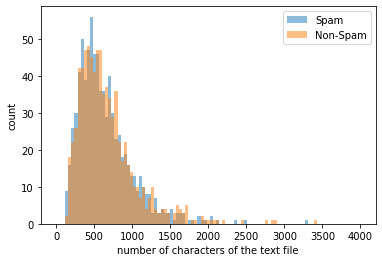

In [18]:
from matplotlib import pyplot
bins = np.linspace(0,4000,100)
pyplot.hist(df[df['Category']==1]['len'],bins, alpha = 0.5, label='Spam')
pyplot.hist(df[df['Category']==0]['len'],bins, alpha = 0.5, label='Non-Spam')
pyplot.legend(loc='upper right')
pyplot.xlabel("number of characters of the text file")
pyplot.ylabel("count")
pyplot.show()

Display a histogram of the number of words in each review

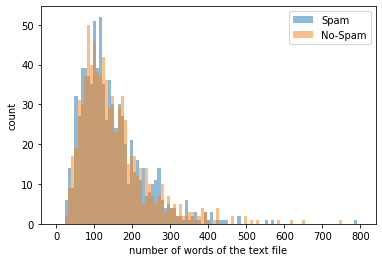

In [19]:
from matplotlib import pyplot
bins = np.linspace(0,800,100)
pyplot.hist(df[df['Category']==1]['word_count'],bins, alpha = 0.5, label='Spam')
pyplot.hist(df[df['Category']==0]['word_count'],bins, alpha = 0.5, label='No-Spam')
pyplot.legend(loc='upper right')
pyplot.xlabel("number of words of the text file")
pyplot.ylabel("count")
pyplot.show()

Display a histogram of the percentage of punctuations in each review

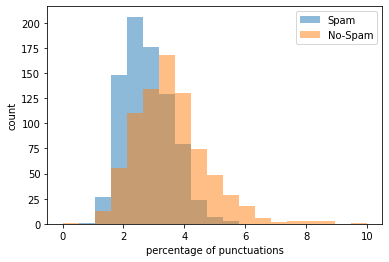

In [20]:
from matplotlib import pyplot
bins = np.linspace(0,10,20)
pyplot.hist(df[df['Category']==1]['punct%'],bins, alpha = 0.5, label='Spam')
pyplot.hist(df[df['Category']==0]['punct%'],bins, alpha = 0.5, label='No-Spam')
pyplot.legend(loc='upper right')
pyplot.xlabel("percentage of punctuations")
pyplot.ylabel("count")
pyplot.show()

In [ ]:
data = df.groupby('Category')['data'].apply(lambda x: list(x))
data=data.reset_index()
data

,Category,data
0,0,"[This morning, I checked out and left behind o..."
1,1,[This hotel seems to take everything about lux...


### **Word Clouds / Bar Graphs**

In [ ]:
import matplotlib.pyplot as plt

# Given a string, display the word cloud associated with the string
# and show the top 10 most occurring words in a bar graph
def word_cloud(text):
  tokens = text.lower().split(" ")
  dictionary = {}
  for i in range(len(tokens)):
    if tokens[i] not in STOPWORDS:
      if tokens[i] in dictionary: dictionary[tokens[i]] += 1
      else: dictionary[tokens[i]] = 1

  comment_words = " ".join(tokens)+" "
  display_word_cloud(comment_words)

  # Sort the dictionary by occurrences
  word_list=sorted((value, key) for (key,value) in dictionary.items())
  sortdict=dict([(k,v) for v,k in word_list])

  # Store the key value pairs as separate lists
  items = list(sortdict.keys())
  values = list(sortdict.values())

  # Plot the last 10 (most occurring) words
  plt.bar(range(10), values[-10:], tick_label=items[-10:])
  plt.show()

In [ ]:
def all_word_cloud(data):
  print("All words in the data")
  truthful = str(data[0]).lower().split(" ")
  deceptive = str(data[1]).lower().split(" ")

  listOfAllWords = deceptive + truth
  all_words = " ".join(listOfAllWords) + " "
  decWords = " ".join(deceptive) + " "
  truthWords = " ".join(truthful) + " "


  display_word_cloud(all_words)
  

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Displays the word cloud for a given string
# Additionally, removes any stopwords from the string.
def display_word_cloud(text):
  wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = STOPWORDS, min_font_size = 10).generate(text)
  # Plot the WordCloud image                       
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

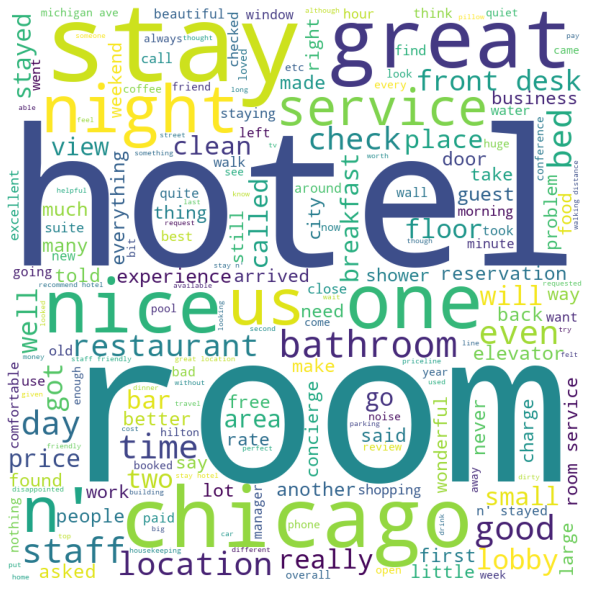

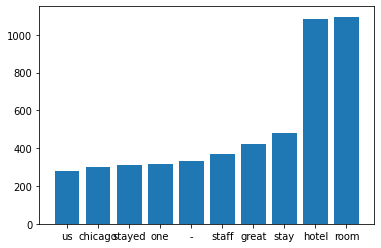

In [ ]:
# generate wold cloud for negative_deceptive reviews
word_cloud(str(data['data'][0]))

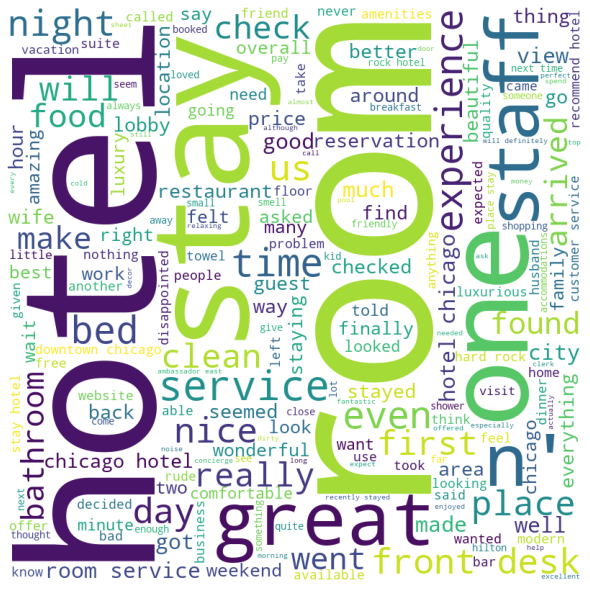

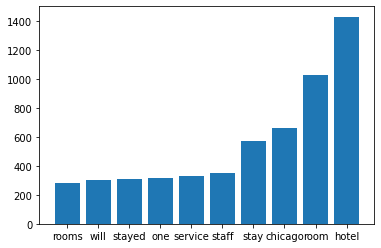

In [ ]:
# generate wold cloud for 
word_cloud(str(data['data'][1]))

##Format Data for Training

In [ ]:
#Lemmatize/Stem
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

# Lemmatize
df['data_lemmatized'] = df['data'].apply(lambda x: " ".join([word.lower() for word in lemmatize_with_postag(x).split(" ")]))
df.head()

,Category,data,len,punct%,word_count,data_lemmatized
0,1,This hotel seems to take everything about luxu...,563,1.8,127,this hotel seem to take everything about luxur...
1,1,After a recent stay at the Talbott Hotel in Ch...,558,2.2,123,after a recent stay at the talbott hotel in ch...
2,1,Terrible time at The Talbott. When I planned m...,749,2.4,185,terrible time at the talbott when i plan my va...
3,1,Hard Rock Hotel boats that they have the best ...,612,1.6,131,hard rock hotel boat that they have the best o...
4,1,My husband and I were planning our 1st year we...,808,1.9,178,my husband and i be plan our 1st year wedding ...


In [ ]:
#Remove punctuation, numbers and extra spaces
import string

df['data_clean'] = df['data'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
df['data_clean'] = df['data_clean'].apply(lambda x: re.sub(r'\d+', '', x))
df['data_clean'] = df['data_clean'].apply(lambda x: x.strip())
df.head()

,Category,data,len,punct%,word_count,data_lemmatized,data_clean
0,1,This hotel seems to take everything about luxu...,563,1.8,127,this hotel seem to take everything about luxur...,this hotel seems to take everything about luxu...
1,1,After a recent stay at the Talbott Hotel in Ch...,558,2.2,123,after a recent stay at the talbott hotel in ch...,after a recent stay at the talbott hotel in ch...
2,1,Terrible time at The Talbott. When I planned m...,749,2.4,185,terrible time at the talbott when i plan my va...,terrible time at the talbott when i planned my...
3,1,Hard Rock Hotel boats that they have the best ...,612,1.6,131,hard rock hotel boat that they have the best o...,hard rock hotel boats that they have the best ...
4,1,My husband and I were planning our 1st year we...,808,1.9,178,my husband and i be plan our 1st year wedding ...,my husband and i were planning our st year wed...


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
stopwords.words('english')
stopword = nltk.corpus.stopwords.words('english')

#Remove Stopwords
def remove_stopwords(tokenized_list):
  text = " ". join([word for word in tokenized_list.split(" ") if word not in stopword])
  return text

df['data_nostop']=df['data_clean'].apply(lambda x: remove_stopwords(x))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Category,data,len,punct%,word_count,data_lemmatized,data_clean,data_nostop
0,1,This hotel seems to take everything about luxu...,563,1.8,127,this hotel seem to take everything about luxur...,this hotel seems to take everything about luxu...,hotel seems take everything luxury force throa...
1,1,After a recent stay at the Talbott Hotel in Ch...,558,2.2,123,after a recent stay at the talbott hotel in ch...,after a recent stay at the talbott hotel in ch...,recent stay talbott hotel chicago left city em...
2,1,Terrible time at The Talbott. When I planned m...,749,2.4,185,terrible time at the talbott when i plan my va...,terrible time at the talbott when i planned my...,terrible time talbott planned vacation chicago...
3,1,Hard Rock Hotel boats that they have the best ...,612,1.6,131,hard rock hotel boat that they have the best o...,hard rock hotel boats that they have the best ...,hard rock hotel boats best high scale accommod...
4,1,My husband and I were planning our 1st year we...,808,1.9,178,my husband and i be plan our 1st year wedding ...,my husband and i were planning our st year wed...,husband planning st year wedding anniversary w...


In [ ]:
#Tokenization
def tokenize(text):
  tokens = re.split('\W+',text)
  return tokens

df['data_tokenized']=df['data_clean'].apply(lambda x : tokenize(x.lower()))
df.head()


,Category,data,len,punct%,word_count,data_lemmatized,data_clean,data_nostop,data_tokenized
0,1,This hotel seems to take everything about luxu...,563,1.8,127,this hotel seem to take everything about luxur...,this hotel seems to take everything about luxu...,hotel seems take everything luxury force throa...,"[this, hotel, seems, to, take, everything, abo..."
1,1,After a recent stay at the Talbott Hotel in Ch...,558,2.2,123,after a recent stay at the talbott hotel in ch...,after a recent stay at the talbott hotel in ch...,recent stay talbott hotel chicago left city em...,"[after, a, recent, stay, at, the, talbott, hot..."
2,1,Terrible time at The Talbott. When I planned m...,749,2.4,185,terrible time at the talbott when i plan my va...,terrible time at the talbott when i planned my...,terrible time talbott planned vacation chicago...,"[terrible, time, at, the, talbott, when, i, pl..."
3,1,Hard Rock Hotel boats that they have the best ...,612,1.6,131,hard rock hotel boat that they have the best o...,hard rock hotel boats that they have the best ...,hard rock hotel boats best high scale accommod...,"[hard, rock, hotel, boats, that, they, have, t..."
4,1,My husband and I were planning our 1st year we...,808,1.9,178,my husband and i be plan our 1st year wedding ...,my husband and i were planning our st year wed...,husband planning st year wedding anniversary w...,"[my, husband, and, i, were, planning, our, st,..."


In [ ]:
# Save the formatted data to a csv continue formatting later
df2 = df[['Category', 'data_nostop']]
df2 = df2.rename(columns={'Category': 'category', 'data_nostop': 'review'})
df2.to_csv("/content/drive/Shareddrives/TCSS 455/data.csv")

### Feature Selection

#### Count Vectorizer

In [ ]:
df1 = pd.read_csv("/content/drive/Shareddrives/TCSS 455/data.csv")
df1= df1.drop(columns = ['Unnamed: 0'])
df1.head()

,category,review
0,1,hotel seems take everything luxury force throa...
1,1,recent stay talbott hotel chicago left city em...
2,1,terrible time talbott planned vacation chicago...
3,1,hard rock hotel boats best high scale accommod...
4,1,husband planning st year wedding anniversary w...


In [ ]:
def preprocessor(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(preprocessor=preprocessor)
X_counts = count_vect.fit_transform(df1['review'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(1600, 9991)
['aaa', 'aaahed', 'aback', 'abassador', 'abd', 'ability', 'able', 'abound', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absent', 'absolute', 'absolutely', 'absolutly', 'absurd', 'abundant', 'abutting', 'abysmal', 'abysmally', 'ac', 'accent', 'accept', 'acceptable', 'accepted', 'accepting', 'accesible', 'access', 'accessibility', 'accessible', 'accessories', 'accidentally', 'accomadating', 'accomadations', 'accomedations', 'accomidations', 'accommodate', 'accommodated', 'accommodating', 'accommodation', 'accommodations', 'accomodate', 'accomodated', 'accomodating', 'accomodatingly', 'accomodations', 'accomondations', 'accompanied', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'according', 'accordingly', 'accost', 'accosted', 'account', 'accountable', 'accountant', 'accounting', 'accounts', 'accoutrements', 'accross', 'accurate', 'accurately', 'accused', 'accustomed', 'acessible', 'ache', 'acheater', 'achegreat', 'aches', 'achieve', 'acknowledge', 'acknowled

In [ ]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

,aaa,aaahed,aback,abassador,abd,ability,able,abound,abrupt,abruptly,abruptness,absence,absent,absolute,absolutely,absolutly,absurd,abundant,abutting,abysmal,abysmally,ac,accent,accept,acceptable,accepted,accepting,accesible,access,accessibility,accessible,accessories,accidentally,accomadating,accomadations,accomedations,accomidations,accommodate,accommodated,accommodating,...,yelp,yep,yes,yesordered,yesterday,yesteryear,yesthe,yet,yielded,yikes,yo,yoga,yogurt,york,yorkers,yorks,youd,yougurt,youidiot,youll,young,younger,youngershe,youre,youth,youve,yr,yrs,yuck,yucky,yumand,yummooverall,yummy,yunan,yup,zagat,zest,zipped,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_counts_df.to_csv('/content/drive/Shareddrives/TCSS 455/count_vet.csv')

####TF - IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(preprocessor= preprocessor)
X_tfidf = tfidf_vect.fit_transform(df1['review'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(1600, 9991)
['aaa', 'aaahed', 'aback', 'abassador', 'abd', 'ability', 'able', 'abound', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absent', 'absolute', 'absolutely', 'absolutly', 'absurd', 'abundant', 'abutting', 'abysmal', 'abysmally', 'ac', 'accent', 'accept', 'acceptable', 'accepted', 'accepting', 'accesible', 'access', 'accessibility', 'accessible', 'accessories', 'accidentally', 'accomadating', 'accomadations', 'accomedations', 'accomidations', 'accommodate', 'accommodated', 'accommodating', 'accommodation', 'accommodations', 'accomodate', 'accomodated', 'accomodating', 'accomodatingly', 'accomodations', 'accomondations', 'accompanied', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'according', 'accordingly', 'accost', 'accosted', 'account', 'accountable', 'accountant', 'accounting', 'accounts', 'accoutrements', 'accross', 'accurate', 'accurately', 'accused', 'accustomed', 'acessible', 'ache', 'acheater', 'achegreat', 'aches', 'achieve', 'acknowledge', 'acknowled

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,aaa,aaahed,aback,abassador,abd,ability,able,abound,abrupt,abruptly,abruptness,absence,absent,absolute,absolutely,absolutly,absurd,abundant,abutting,abysmal,abysmally,ac,accent,accept,acceptable,accepted,accepting,accesible,access,accessibility,accessible,accessories,accidentally,accomadating,accomadations,accomedations,accomidations,accommodate,accommodated,accommodating,...,yelp,yep,yes,yesordered,yesterday,yesteryear,yesthe,yet,yielded,yikes,yo,yoga,yogurt,york,yorkers,yorks,youd,yougurt,youidiot,youll,young,younger,youngershe,youre,youth,youve,yr,yrs,yuck,yucky,yumand,yummooverall,yummy,yunan,yup,zagat,zest,zipped,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.08519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
X_tfidf_df.to_csv('/content/drive/Shareddrives/TCSS 455/tfidf.csv')

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/TCSS 455/tfidf.csv')
data= data.drop(columns = ['Unnamed: 0'])
data.head()

,aaa,aaahed,aback,abassador,abd,ability,able,abound,abrupt,abruptly,abruptness,absence,absent,absolute,absolutely,absolutly,absurd,abundant,abutting,abysmal,abysmally,ac,accent,accept,acceptable,accepted,accepting,accesible,access,accessibility,accessible,accessories,accidentally,accomadating,accomadations,accomedations,accomidations,accommodate,accommodated,accommodating,...,yelp,yep,yes,yesordered,yesterday,yesteryear,yesthe,yet,yielded,yikes,yo,yoga,yogurt,york,yorkers,yorks,youd,yougurt,youidiot,youll,young,younger,youngershe,youre,youth,youve,yr,yrs,yuck,yucky,yumand,yummooverall,yummy,yunan,yup,zagat,zest,zipped,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.08519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_features = pd.concat([df['punct%'], data], axis = 1)
X_features.head()

,punct%,aaa,aaahed,aback,abassador,abd,ability,able,abound,abrupt,abruptly,abruptness,absence,absent,absolute,absolutely,absolutly,absurd,abundant,abutting,abysmal,abysmally,ac,accent,accept,acceptable,accepted,accepting,accesible,access,accessibility,accessible,accessories,accidentally,accomadating,accomadations,accomedations,accomidations,accommodate,accommodated,...,yelp,yep,yes,yesordered,yesterday,yesteryear,yesthe,yet,yielded,yikes,yo,yoga,yogurt,york,yorkers,yorks,youd,yougurt,youidiot,youll,young,younger,youngershe,youre,youth,youve,yr,yrs,yuck,yucky,yumand,yummooverall,yummy,yunan,yup,zagat,zest,zipped,zone,zoo
0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.08519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_features.to_csv('/content/drive/Shareddrives/TCSS 455/tfidf_punct.csv')

# Part B

## Initalize Data

In [ ]:
# Read in the data we will train with
df = pd.read_csv('/content/drive/Shareddrives/TCSS 455/tfidf_punct.csv')
df= df.drop(columns = ['Unnamed: 0'])
df.head()

,punct%,aaa,aaahed,aback,abassador,abd,ability,able,abound,abrupt,abruptly,abruptness,absence,absent,absolute,absolutely,absolutly,absurd,abundant,abutting,abysmal,abysmally,ac,accent,accept,acceptable,accepted,accepting,accesible,access,accessibility,accessible,accessories,accidentally,accomadating,accomadations,accomedations,accomidations,accommodate,accommodated,...,yelp,yep,yes,yesordered,yesterday,yesteryear,yesthe,yet,yielded,yikes,yo,yoga,yogurt,york,yorkers,yorks,youd,yougurt,youidiot,youll,young,younger,youngershe,youre,youth,youve,yr,yrs,yuck,yucky,yumand,yummooverall,yummy,yunan,yup,zagat,zest,zipped,zone,zoo
0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.08519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Read in the original data with the labels for the train and test sets
data = pd.read_csv("/content/drive/Shareddrives/TCSS 455/data.csv")
data= data.drop(columns = ['Unnamed: 0'])
data.head()

,category,review
0,1,hotel seems take everything luxury force throa...
1,1,recent stay talbott hotel chicago left city em...
2,1,terrible time talbott planned vacation chicago...
3,1,hard rock hotel boats best high scale accommod...
4,1,husband planning st year wedding anniversary w...


## Split Data into Train and Test sets

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#spliting the data into training data and testing data
#train_data_x, test_data_x,train_data_y, test_data_y = train_test_split(df, data['category'], test_size=0.2, shuffle = True, random_state=101)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, data['category']):
 train_data_x, train_data_y = df.loc[train_index], data['category'].loc[train_index]
 test_data_x, test_data_y = df.loc[test_index], data['category'].loc[test_index]

def displayResults(test, predictions):
  print("Results\n------------------")
  print("Accuracy: %s" % accuracy_score(test, predictions))
  print("Precision: %s" % precision_score(test, predictions))
  print("Recall: %s" % recall_score(test, predictions))
  print("F1: %s" % f1_score(test, predictions))
  print("\n")


### Trained Models - Graph / Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# For each parameter tested in grid search, plot the median test score
def showModel(gridSearch, metric='mean_test_score', name=""):
  testScores = gridSearch.cv_results_[metric]
  params = gridSearch.cv_results_['params']
  ind = np.arange(len(testScores))

  fig, ax = plt.subplots()

  ax.barh(ind, testScores, align='center')
  ax.set_yticks(ind)
  ax.set_yticklabels(params)
  ax.invert_yaxis()
  ax.set_xlabel('Median Test Score')
  ax.set_title('Test Score vs Parameters' + " | %s" % name)

  plt.show()

## Train and Test Models

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(3, 7):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(train_data_x, train_data_y)
  y_pred = classifier.predict(test_data_x)
  print(str(i) + "Neighbors")
  displayResults(test_data_y, y_pred)

3Neighbors
Results
------------------
Accuracy: 0.784375
Precision: 0.7357512953367875
Recall: 0.8875
F1: 0.8045325779036827


4Neighbors
Results
------------------
Accuracy: 0.7875
Precision: 0.7804878048780488
Recall: 0.8
F1: 0.7901234567901235


5Neighbors
Results
------------------
Accuracy: 0.78125
Precision: 0.734375
Recall: 0.88125
F1: 0.8011363636363635


6Neighbors
Results
------------------
Accuracy: 0.7875
Precision: 0.7613636363636364
Recall: 0.8375
F1: 0.7976190476190477




In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()
n_neighbors = range(3, 7)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=classifier, param_grid=grid, cv=5, scoring='accuracy', error_score=0, verbose=1)
grid_result = grid_search.fit(train_data_x, train_data_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  9.7min finished


Best: 0.746094 using {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}


Results
------------------
Accuracy: 0.7875
Precision: 0.7613636363636364
Recall: 0.8375
F1: 0.7976190476190477




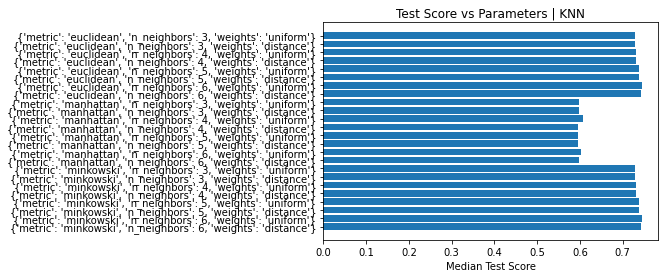

In [ ]:
gs_model = grid_result.best_estimator_
y_pred= gs_model.predict(test_data_x)
displayResults(test_data_y, y_pred)
showModel(grid_search, name="KNN")

###Logistic Regression

In [ ]:
# Run the base logistic regression model (no change in parameters)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
log_reg.fit(train_data_x, train_data_y)
y_pred = log_reg.predict(test_data_x)
displayResults(test_data_y, y_pred)

Results
------------------
Accuracy: 0.815625
Precision: 0.791907514450867
Recall: 0.85625
F1: 0.8228228228228228




In [ ]:
# Fine-Tune the Model
# Source: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1] # Penalty strength

# Run grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision', error_score=0, verbose=1)
grid_result = grid_search.fit(train_data_x, train_data_y)

# Summarize the best scores / parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.6min finished


Best: 0.869156 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


Results
------------------
Accuracy: 0.875
Precision: 0.8488372093023255
Recall: 0.9125
F1: 0.8795180722891567




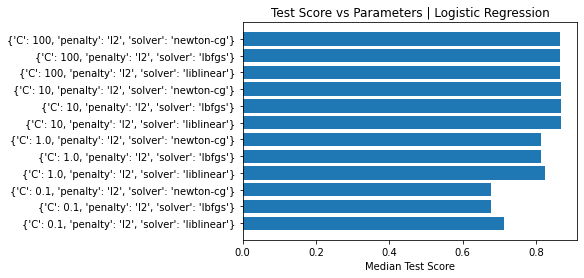

In [ ]:
# Run the model with the best estimator from GridSearchCV
log_reg = grid_result.best_estimator_
log_reg.fit(train_data_x, train_data_y)
y_pred = log_reg.predict(test_data_x)
displayResults(test_data_y, y_pred)
showModel(grid_search, name="Logistic Regression")

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
forest_reg = RandomForestClassifier()
start = time.time()
forest_reg.fit(train_data_x, train_data_y)
end = time.time()
train_time = end - start
y_pred = forest_reg.predict(test_data_x)
displayResults(test_data_y, y_pred)
print( "training time is ", train_time)

Results
------------------
Accuracy: 0.846875
Precision: 0.8404907975460123
Recall: 0.85625
F1: 0.848297213622291


training time is  1.3973960876464844


Fine tune the model

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
start = time.time()
param_grid = [
              {'n_estimators': [100, 200, 300, 500]},
              {'bootstrap': [False], 'n_estimators': [100, 200, 300]},
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='average_precision')
grid_search.fit(train_data_x, train_data_y)
end = time.time()
train_time=end - start
print( "training time is ", train_time)

training time is  103.65676808357239


In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
grid_search.best_params_

{'n_estimators': 500}

Results
------------------
Accuracy: 0.865625
Precision: 0.838150289017341
Recall: 0.90625
F1: 0.8708708708708709




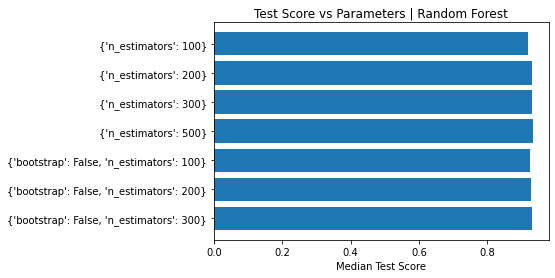

In [ ]:
final_model = grid_search.best_estimator_
final_prediction = final_model.predict(test_data_x)
displayResults(test_data_y, final_prediction)
showModel(grid_search, name="Random Forest")

###Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC()

st = time.time()
linearSVC.fit(train_data_x, train_data_y)
et = time.time()

y_pred = linearSVC.predict(test_data_x)
ep = time.time()

displayResults(test_data_y, y_pred)
print('Training time: %f' %(et-st))
print('Testing time: %f' %(ep-et))

Results
------------------
Accuracy: 0.878125
Precision: 0.8457142857142858
Recall: 0.925
F1: 0.8835820895522388


Training time: 0.273548
Testing time: 0.013042


Fine Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
  
# defining parameter range
param_grid = {'C': [0.9, 1, 1.1, 10, 100], 
              'penalty': ['l2'],
              'loss': ['hinge', 'squared_hinge']} 
  
grid_model = GridSearchCV(LinearSVC(random_state=42, max_iter=20000), param_grid, refit = 'precision', cv = 5, scoring = ['precision', 'accuracy', 'recall', 'f1'], verbose = 1)
  
# fitting the model for grid search
grid_SVC = grid_model.fit(train_data_x, train_data_y)

# Summarize the best scores / parameters
print("Best: %f using %s" % (grid_SVC.best_score_, grid_SVC.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.2s finished


Best: 0.880789 using {'C': 1.1, 'loss': 'hinge', 'penalty': 'l2'}


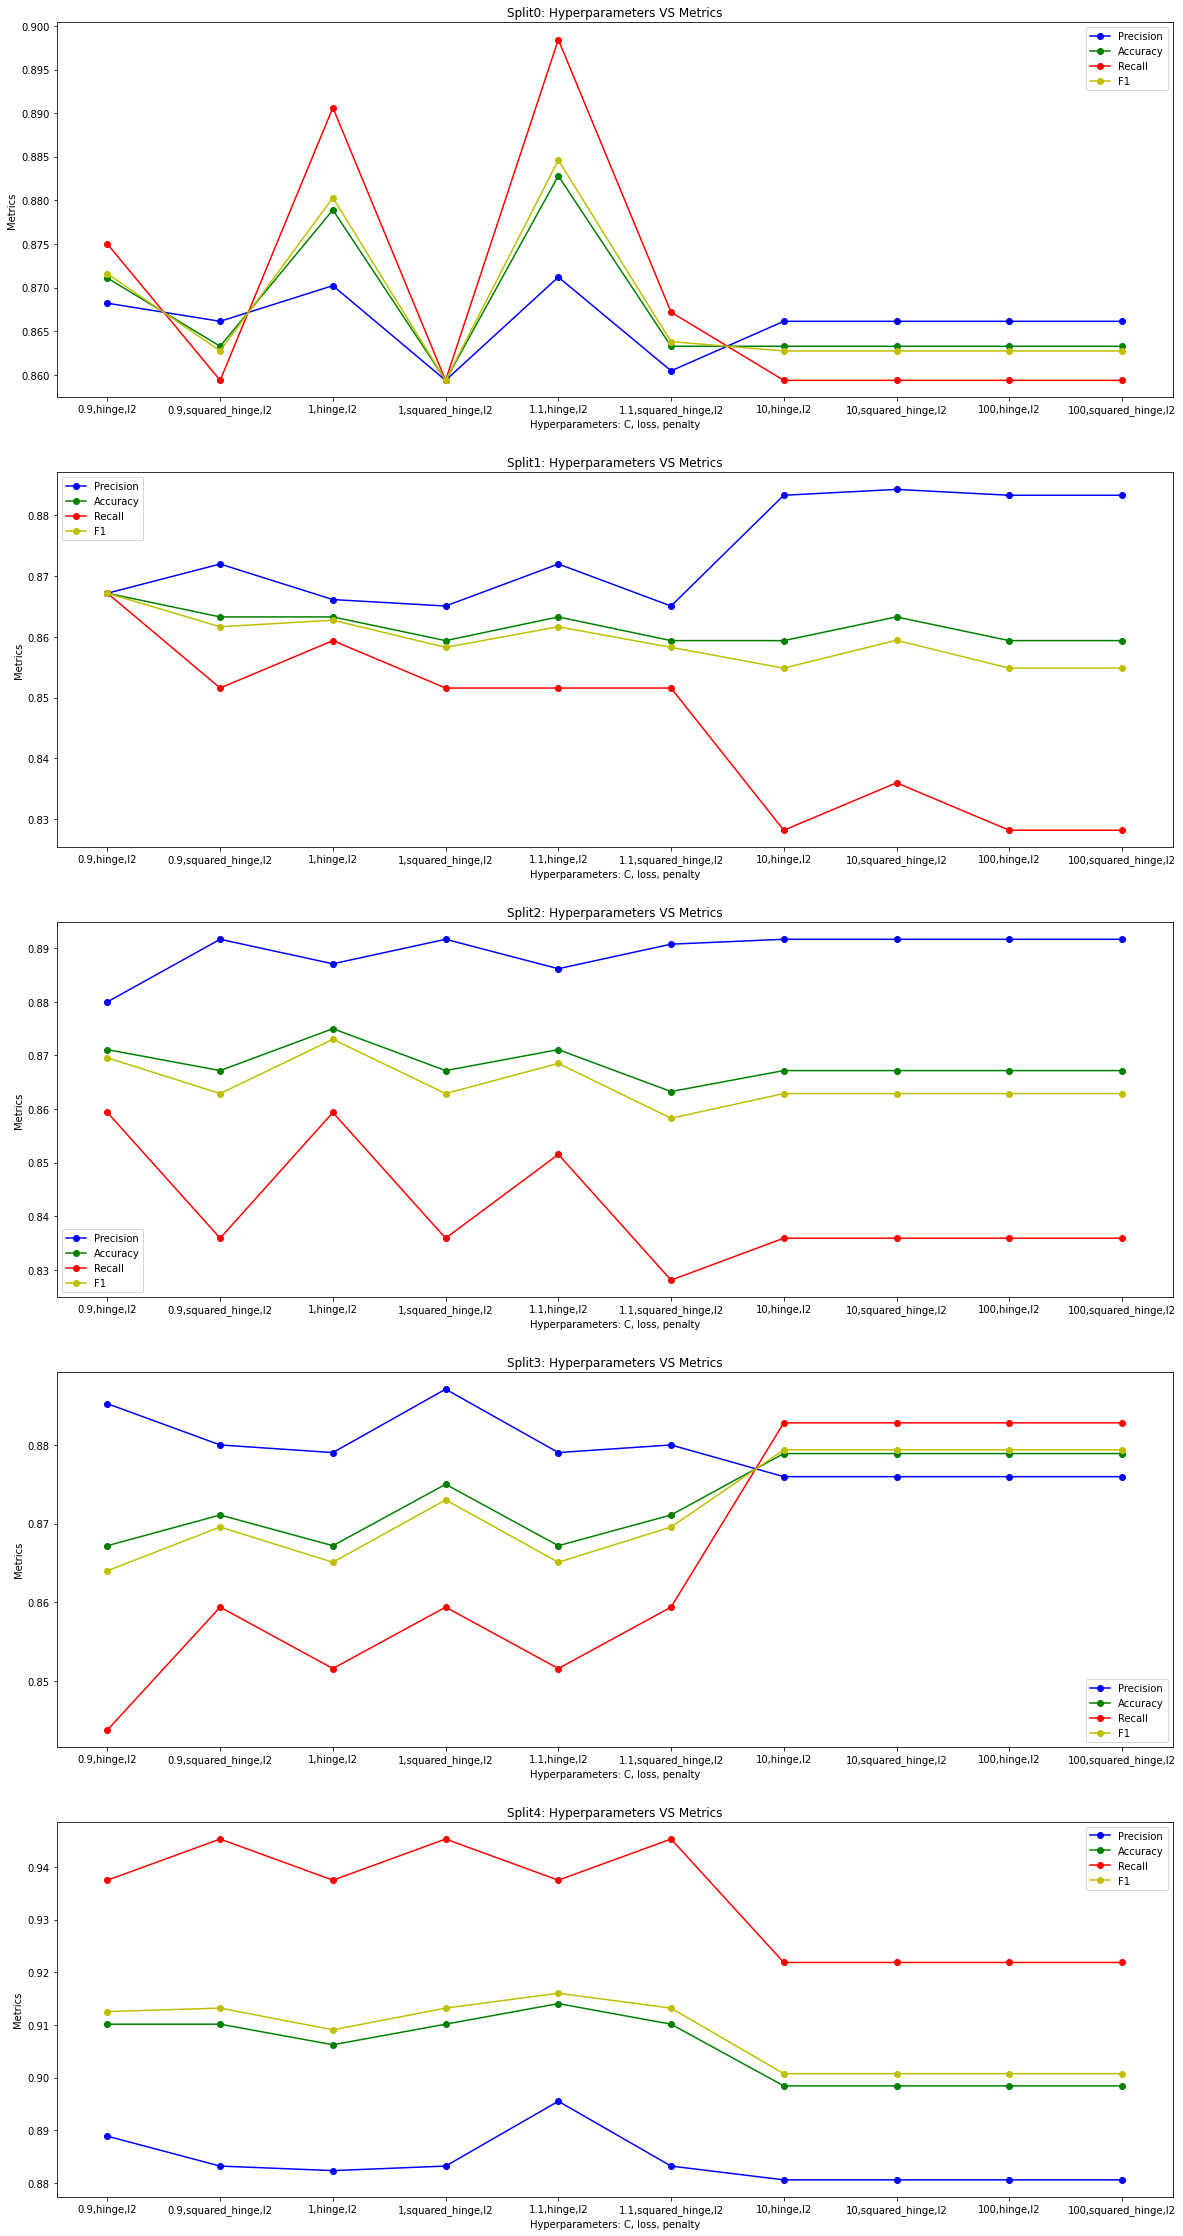

In [ ]:
import matplotlib.pyplot as plt

params = []
for param in grid_model.cv_results_.get('params'):
  params.append(str(param.get('C')) + ',' + param.get('loss') + ',' + param.get('penalty'))

plt.figure(figsize=(20, 40))

x = [i+1 for i in range(len(params))]
for i in range(5):
  plt.subplot(5, 1, i+1)
  y1 = grid_model.cv_results_.get('split'+str(i)+'_test_precision')
  y2 = grid_model.cv_results_.get('split'+str(i)+'_test_accuracy')
  y3 = grid_model.cv_results_.get('split'+str(i)+'_test_recall')
  y4 = grid_model.cv_results_.get('split'+str(i)+'_test_f1')

  xticks = params
  plt.xticks(x, xticks)
  plt.rcParams['xtick.labelsize']=10
  plt.xlabel('Hyperparameters: C, loss, penalty')
  plt.ylabel('Metrics')
  plt.title('Split'+str(i)+': Hyperparameters VS Metrics')

  plt.plot(x, y1, 'bo-', label='Precision')
  plt.plot(x, y2, 'go-', label='Accuracy')
  plt.plot(x, y3, 'ro-', label='Recall')
  plt.plot(x, y4, 'yo-', label='F1')
  plt.legend()
plt.show()

In [ ]:
# print best parameter after tuning
print(grid_model.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_model.best_estimator_)

{'C': 1.1, 'loss': 'hinge', 'penalty': 'l2'}
LinearSVC(C=1.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=20000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)


In [ ]:
grid_predictions = grid_model.predict(test_data_x)
  
# print classification report
displayResults(test_data_y, grid_predictions)

Results
------------------
Accuracy: 0.871875
Precision: 0.8562874251497006
Recall: 0.89375
F1: 0.8746177370030581




In [ ]:
from sklearn.svm import LinearSVC

linearSVC = grid_model.best_estimator_

st = time.time()
linearSVC.fit(train_data_x, train_data_y)
et = time.time()

y_pred = linearSVC.predict(test_data_x)
ep = time.time()

displayResults(test_data_y, y_pred)
print('Training time: %f' %(et-st))
print('Testing time: %f' %(ep-et))

Results
------------------
Accuracy: 0.871875
Precision: 0.8562874251497006
Recall: 0.89375
F1: 0.8746177370030581


Training time: 0.249820
Testing time: 0.010893


##Compare the models

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
import math

def compute_CV_precision(modelA, modelB, X_train, Y_train):

    kf = KFold(n_splits=5)
    validation_precision_A = []
    validation_precision_B = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx],X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]


        # Fit the modelA on the training split
        modelA.fit(split_X_train,split_Y_train)
        
        
        # Compute the accuracy on the validation split
        precisionA = precision_score(modelA.predict(split_X_valid), split_Y_valid)
        validation_precision_A.append(precisionA)

        # Fit the modelB on the training split
        modelB.fit(split_X_train,split_Y_train)
        
        # Compute the accuracy on the validation split
        precisionB = precision_score(modelB.predict(split_X_valid), split_Y_valid)
        validation_precision_B.append(precisionB)
        
    return validation_precision_A, np.mean(validation_precision_A), validation_precision_B, np.mean(validation_precision_B)

In [ ]:
from scipy import stats
#compare KNN and Logistic Regression

result = compute_CV_precision(gs_model, log_reg, train_data_x,train_data_y)
print('Mean precision for KNN: %f' %(result[1]))
print('Mean precision for Logistic Regression: %f' %(result[3]))
precisionA = result[0]
precisionB = result[2]
stats.ttest_ind(precisionA, precisionB)

Mean precision for KNN: 0.754548
Mean precision for Logistic Regression: 0.836014


Ttest_indResult(statistic=-4.320094405737684, pvalue=0.002545745421950463)

In [ ]:
#compare KNN and Random Forest
result = compute_CV_precision(gs_model, final_model, train_data_x,train_data_y)
print('Mean precision for KNN: %f' %(result[1]))
print('Mean precision for Random Forest: %f' %(result[3]))
precisionA = result[0]
precisionB = result[2]
stats.ttest_ind(precisionA, precisionB)

Mean precision for KNN: 0.754548
Mean precision for Random Forest: 0.870513


Ttest_indResult(statistic=-6.257326731431316, pvalue=0.00024376755238602943)

In [ ]:
#compare KNN and LinearSVC
result = compute_CV_precision(gs_model, linearSVC, train_data_x,train_data_y)
print('Mean precision for KNN: %f' %(result[1]))
print('Mean precision for LinearSVC: %f' %(result[3]))
precisionA = result[0]
precisionB = result[2]
stats.ttest_ind(precisionA, precisionB)

Mean precision for KNN: 0.754548
Mean precision for LinearSVC: 0.867786


Ttest_indResult(statistic=-5.420856303807617, pvalue=0.0006301571496685905)

In [ ]:
#compare logistic regression and Random Forest
result = compute_CV_precision(log_reg, final_model, train_data_x,train_data_y)
print('Mean precision for Logistic Regression: %f' %(result[1]))
print('Mean precision for Random Forest: %f' %(result[3]))
precisionA = result[0]
precisionB = result[2]
stats.ttest_ind(precisionA, precisionB)

Mean precision for Logistic Regression: 0.836014
Mean precision for Random Forest: 0.868886


Ttest_indResult(statistic=-2.106072533945213, pvalue=0.06828934119936836)

In [ ]:
#compare logistic regression and LinearSVC
result = compute_CV_precision(log_reg, linearSVC, train_data_x,train_data_y)
print('Mean precision for Logistic Regression: %f' %(result[1]))
print('Mean precision for LinearSVC: %f' %(result[3]))
precisionA = result[0]
precisionB = result[2]
stats.ttest_ind(precisionA, precisionB)

Mean precision for Logistic Regression: 0.836014
Mean precision for LinearSVC: 0.867786


Ttest_indResult(statistic=-1.4616311187441127, pvalue=0.18198019381690017)

In [ ]:
#compare LinearSVC and Random Forest
result = compute_CV_precision(linearSVC, final_model, train_data_x,train_data_y)
print('Mean precision for LinearSVC: %f' %(result[1]))
print('Mean precision for Random Forest: %f' %(result[3]))
precisionA = result[0]
precisionB = result[2]
stats.ttest_ind(precisionA, precisionB)

Mean precision for LinearSVC: 0.867786
Mean precision for Random Forest: 0.873328


Ttest_indResult(statistic=-0.3008613672356017, pvalue=0.7711910999570812)